In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

In [3]:
# input f(x)
coe = list(map(int, input('coefficient: ').split()))
deg = len(coe) - 1

# define f(x)
f_string = ''
for d in range(deg, -1, -1):
  f_string += f'+{coe[deg-d]}*(x**{deg})'

def f(x):
  return eval(f_string)

coefficient: 1 0 0


In [16]:
# set x range
x_range = (-6, 6)

# set y range
y_range_auto = True # True to set y range to auto
y_range = (-10, 10)

In [17]:
# define x values
num = 10 * (x_range[1] - x_range[0])
x = np.linspace(x_range[0], x_range[1], num)

# calculate y values
y = f(x)

# differentiate the function using SymPy
x_sym = sympy.Symbol('x')

f_sym_string = ''
for d in range(deg, 0, -1):
  f_sym_string += f'+{coe[deg-d]}*(x_sym**{deg})'

f_sym = sympy.parsing.sympy_parser.parse_expr(f_string)
f_prime_sym = f_sym.diff(x_sym)
f_prime = np.array([f_prime_sym.subs(x_sym, x_val).evalf() for x_val in x])  # convert back to NumPy array

# integrate the function using SymPy
f_integral_sym = sympy.integrate(f_sym, x_sym)
f_integral = np.array([f_integral_sym.subs(x_sym, x_val).evalf() for x_val in x])  # convert back to NumPy array

# done!
print('done!')

done!


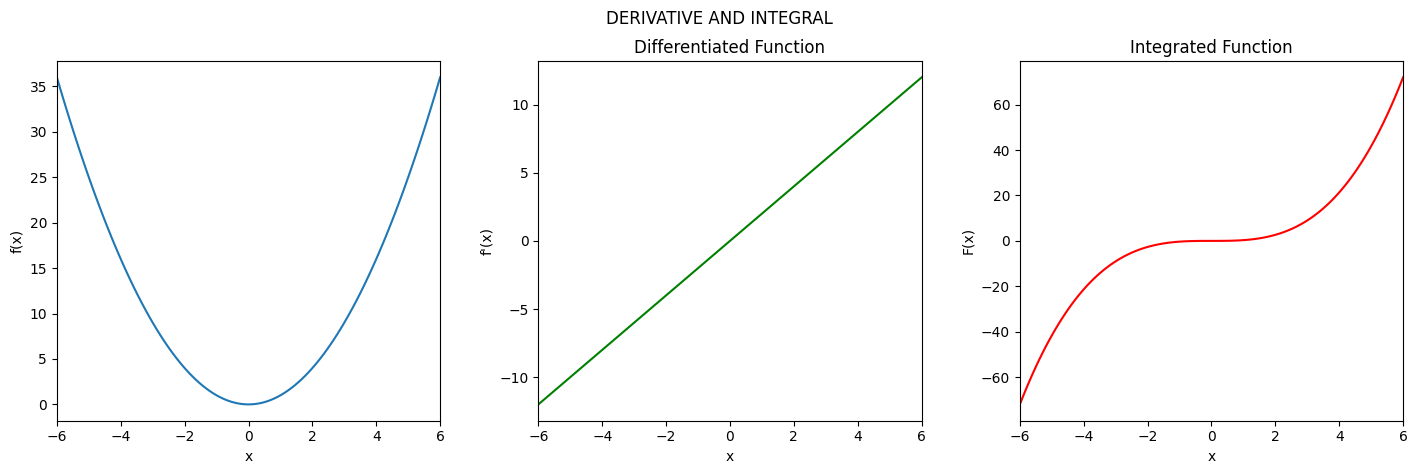

In [18]:
# set up the plot and display it
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.tight_layout(pad=4.0)
fig.suptitle('DERIVATIVE AND INTEGRAL')

# plot the original function
ax[0].plot(x, y)
ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')
ax[0].set_xlim(x_range[0], x_range[1])

# plot the differentiated function
ax[1].plot(x, f_prime, color='green')
ax[1].set_xlabel('x')
ax[1].set_ylabel('f\'(x)')
ax[1].set_title('Differentiated Function')
ax[1].set_xlim(x_range[0], x_range[1])

# plot the integrated function
ax[2].plot(x, f_integral, color='red')
ax[2].set_xlabel('x')
ax[2].set_ylabel('F(x)')
ax[2].set_title('Integrated Function')
ax[2].set_xlim(x_range[0], x_range[1])

# setting y range to the functions
if not y_range_auto:
  ax[0].set_ylim(y_range[0], y_range[1])
  ax[1].set_ylim(y_range[0], y_range[1])
  ax[2].set_ylim(y_range[0], y_range[1])

# show the plot
plt.show()